<b>Name - H.M.P.Siriwardana<br>
Index- 190595J<br>
Assignment_02<br>

1

In [5]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import circle_fit as cf
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random. uniform(0 , 2*np . pi , half_n )
n = s*np . random. randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random. randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )


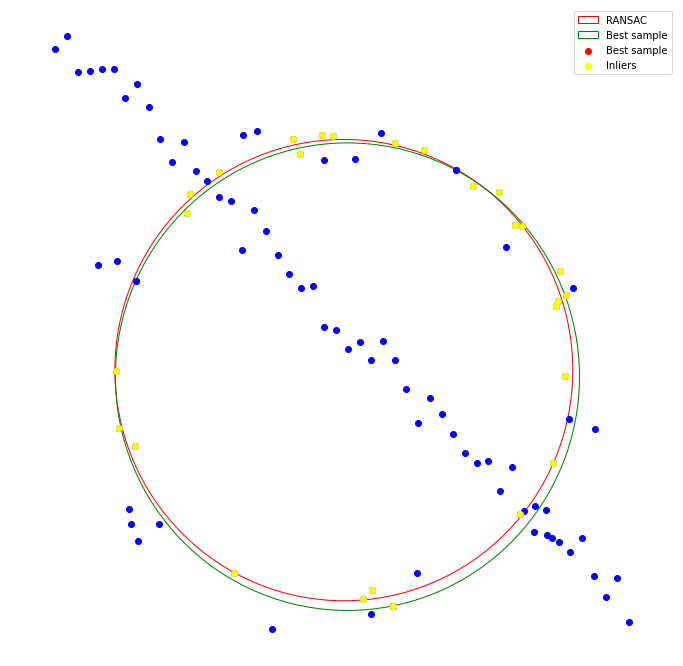

In [25]:
def Circle_RANSAC(points):
    threshold = np.std(points)/16  
    num_iter = np.log(1 - 0.95)/np.log(1 - (1 - 0.5)**3)  
    iter_completed, max_inlierc, selected_model = 0, 0, None

    while iter_completed < num_iter:
        iter_completed += 1
        np.random.shuffle(points)  
        sample_points = points[:3]
        xc,yc,radius,_ = cf.least_squares_circle((sample_points)) 
        center = (xc, yc)
        error = np.abs(radius - np.sqrt(np.sum((center - points[3:])**2, axis=1))) 
        inliers = error <= threshold 
        inlier_c = np.count_nonzero(inliers)


        if inlier_c > max_inlierc: 
            max_inlierc = inlier_c
            inlier_points = []

            for index, inlier in enumerate(inliers): 
                if inlier == True:
                    inlier_points.append(points[3:][index])
            inlier_points = np.array(inlier_points)
            selected_model = (center, radius, sample_points, inlier_points)


    xc,yc,radius,_ = cf.least_squares_circle(np.concatenate((selected_model[2], selected_model[3]), axis=0))
    best_m = ((xc, yc), radius, selected_model[2], selected_model[3])
    return best_m 

best_m = Circle_RANSAC(X_circ)
xc,yc,r,_ = cf.least_squares_circle(best_m[2])

figure, ax = plt.subplots(figsize=(12, 12))
RASNSAC_circle = plt.Circle(best_m[0], best_m[1], fill=False, color='red', label='RANSAC')        
ax.add_artist(RASNSAC_circle)
circle = plt.Circle((xc, yc), r, fill=False, color='green', label='Best sample')    
ax.add_artist(circle)
ax.scatter(best_m[2][:, 0], best_m[2][:, 1], c='red', label='Best sample')
ax.scatter(X_circ[:, 0], X_circ[:, 1], c='blue')
ax.scatter(X_line[:, 0], X_line[:, 1], c='blue')
ax.scatter(best_m[3][:, 0], best_m[3][:, 1], c='yellow', label='Inliers')

plt.legend(loc=1)
plt.xlim(-14, 14)
plt.axis('off')
plt.show()